In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm

diff90_threshold = 10 #Angle needs to be within 10 degrees of 90 degrees to qualify as reset point !!Need to test!!


In [2]:
#read in the data
df=pd.read_csv('Data/26_07_15_56_53.csv')
df.head()

,Pelvis,SpineNavel,SpineChest,Neck,ClavicleLeft,ShoulderLeft,ElbowLeft,WristLeft,HandLeft,HandTipLeft,...,HipRight,KneeRight,AnkleRight,FootRight,Head,Nose,EyeLeft,EarLeft,EyeRight,EarRight
0,0.108471 0.28940737 1.2758763,0.10532978 0.114558965 1.2327564,0.0964132 -0.026301267 1.2042474,0.08705284 -0.24139363 1.163144,0.11199 -0.21176802 1.1939524,0.21230051 -0.18476869 1.2941399,0.23287329 0.07369758 1.3971288,0.2894878 0.30090678 1.3979189,0.30668277 0.3934983 1.4220419,0.27719167 0.39879444 1.3171482,...,0.051518135 0.30482993 1.217488,0.049967553 0.7046853 1.2732967,-0.01684023 1.0576167 1.4260355,0.05077507 1.206381 1.3662214,0.09309785 -0.31982017 1.1383667,0.16230342 -0.36558226 0.9989596,0.1690915 -0.3996857 1.0435023,0.1707252 -0.38409472 1.1705247,0.12395069 -0.39649534 1.0163301,0.020012721 -0.38579127 1.0974425
1,0.1126227 0.2885084 1.2801337,0.10988665 0.11371352 1.23842,0.10131926 -0.027090743 1.211127,0.09189406 -0.24220468 1.1727722,0.11715044 -0.2122291 1.2028003,0.21695696 -0.18510424 1.3030074,0.23293193 0.07444711 1.4023846,0.28878745 0.30124587 1.3964646,0.30305222 0.3928899 1.4248857,0.2775459 0.4013349 1.3194008,...,0.055231325 0.30322057 1.2222489,0.05245776 0.7026259 1.274819,-0.015269678 1.0550057 1.4262627,0.050576456 1.2037165 1.3654459,0.09775219 -0.3207332 1.1488829,0.17056268 -0.37480885 1.014799,0.17552012 -0.4063771 1.0612558,0.17337105 -0.38379532 1.1869339,0.13139123 -0.4042341 1.0325819,0.025333714 -0.38796076 1.1094464
2,0.12641557 0.2786568 1.2712891,0.1186706 0.10428949 1.241722,0.11694547 -0.03253986 1.2056155,0.09909604 -0.24538897 1.1775964,0.13023993 -0.21516415 1.1995502,0.2465775 -0.18410033 1.2745243,0.22572112 0.07236815 1.369273,0.26908758 0.28901464 1.304858,0.28838444 0.3372149 1.3850691,0.27110153 0.42071688 1.3200725,...,0.049463414 0.28647587 1.2453346,0.033451363 0.6765386 1.316425,0.017913152 1.0223851 1.4817177,0.03401134 1.1622005 1.3845408,0.099181145 -0.32344368 1.155747,0.18408895 -0.37942946 1.032949,0.1866339 -0.40790322 1.0805659,0.17317724 -0.37964657 1.2024016,0.1456136 -0.40947196 1.048843,0.034572132 -0.39514396 1.1149226
3,0.12589161 0.26264706 1.2778023,0.1245911 0.09028137 1.2566378,0.12681574 -0.044706404 1.2242495,0.11340897 -0.2545335 1.2028981,0.14408806 -0.22359417 1.2223412,0.26114142 -0.19081767 1.290076,0.22813016 0.06542103 1.3649935,0.26137853 0.27254403 1.2815174,0.26341608 0.34464884 1.3413743,0.24577409 0.40441296 1.2566364,...,0.047525913 0.26521176 1.2617306,0.02474345 0.6442841 1.3473018,0.017564371 0.9837897 1.5095437,0.014416948 1.1206936 1.4125997,0.11451113 -0.33162683 1.1834495,0.19685516 -0.38477153 1.0615393,0.19881658 -0.41400322 1.1074768,0.1860596 -0.38930085 1.2277076,0.15857032 -0.41396192 1.0763243,0.049876958 -0.39968398 1.1415029
4,0.12873398 0.2569512 1.2838813,0.12940054 0.08565445 1.263963,0.13321546 -0.048702598 1.2332875,0.12037356 -0.25729132 1.2141249,0.15053158 -0.22633502 1.2335414,0.26701835 -0.19679047 1.3017485,0.2336231 0.06436469 1.3468726,0.25944084 0.27455923 1.2732801,0.24787706 0.34183347 1.3365594,0.24660577 0.42976218 1.2801998,...,0.051107533 0.2586233 1.2669038,0.022151306 0.6366299 1.3424064,0.011346031 0.96545786 1.5196685,0.009025029 1.1053759 1.4292448,0.12180741 -0.3340472 1.19565,0.1986717 -0.38851097 1.072151,0.20207888 -0.41715378 1.117925,0.19399449 -0.39148533 1.2374749,0.16100436 -0.41707087 1.088479,0.05563269 -0.40148705 1.1569909


In [97]:
#Keep only relevant columns for Right hand bicep curl
bicepcurl_columns = ['WristRight','ElbowRight','ShoulderRight','Neck','Pelvis','HipLeft','HipRight']
df_bicep_right = df[bicepcurl_columns]

In [98]:
#Create the torso length for normalization
df_bicep_right.head()
#use the first entry to calculate torso length
df_torso = df_bicep_right[['Neck','HipLeft','HipRight']].loc[0,:]
def vectorize_list(l):
    return np.array(l.split()).astype(np.float)
#torso_length
vec_neck = vectorize_list(df_torso[0])
vec_hipleft = vectorize_list(df_torso[1])
vec_hipright = vectorize_list(df_torso[2])

dist_neck_hipleft = np.linalg.norm(vec_neck-vec_hipleft)
dist_neck_hipright = np.linalg.norm(vec_neck-vec_hipright)
torso_length = (dist_neck_hipright + dist_neck_hipright)/2 



In [99]:
#Normalize the array keeping relevant columns and dividing all entries by torso_length
#df_bicep_right = df_bicep_right.drop(['HipLeft','HipRight'],axis=1)
dfsample = df_bicep_right
dfsample[['WristRight_x','WristRight_y','WristRight_z']]= dfsample.WristRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['ElbowRight_x','ElbowRight_y','ElbowRight_z']]= dfsample.ElbowRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['ShoulderRight_x','ShoulderRight_y','ShoulderRight_z']]= dfsample.ShoulderRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['Neck_x','Neck_y','Neck_z']]= dfsample.Neck.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['Pelvis_x','Pelvis_y','Pelvis_z']]= dfsample.Pelvis.apply( lambda x: pd.Series(str(x).split())) 
dfsample = dfsample.drop(['WristRight','ElbowRight','ShoulderRight','Neck','Pelvis','HipLeft','HipRight'],axis=1)
dfsample = dfsample.astype(float)
dfnormalized = dfsample/torso_length 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [102]:
#dfsample.astype(float)
dfnormalized.head()

,WristRight_x,WristRight_y,WristRight_z,ElbowRight_x,ElbowRight_y,ElbowRight_z,ShoulderRight_x,ShoulderRight_y,ShoulderRight_z,Neck_x,Neck_y,Neck_z,Pelvis_x,Pelvis_y,Pelvis_z
0,-0.004435,0.709425,1.967712,-0.056036,0.281560,1.977502,-0.033045,-0.233854,1.947746,0.158258,-0.438842,2.114541,0.197195,0.526129,2.319483
1,0.007952,0.700903,1.972101,-0.054344,0.275870,1.994215,-0.028952,-0.238511,1.968195,0.167059,-0.440317,2.132045,0.204743,0.524495,2.327223
2,0.028004,0.678683,1.974063,-0.043514,0.264912,2.030520,-0.028268,-0.242200,2.006235,0.180152,-0.446106,2.140815,0.229818,0.506585,2.311144
3,0.029629,0.636670,2.032588,-0.027523,0.227663,2.079541,-0.004023,-0.269399,2.053866,0.206172,-0.462730,2.186812,0.228865,0.477480,2.322984
4,0.035241,0.620009,2.065377,-0.017194,0.212204,2.101413,0.009816,-0.280823,2.069449,0.218833,-0.467744,2.207222,0.234032,0.467125,2.334036


In [118]:
#Create wrist elbow vector
dfnormalized['right_elbow_wrist_x'] = dfnormalized['WristRight_x'] - dfnormalized['ElbowRight_x']
dfnormalized['right_elbow_wrist_y'] = dfnormalized['WristRight_y'] - dfnormalized['ElbowRight_y']
dfnormalized['right_elbow_wrist_z'] = dfnormalized['WristRight_z'] - dfnormalized['ElbowRight_z']

#Create elbow shoulder vector
dfnormalized['right_elbow_shoulder_x'] = dfnormalized['ShoulderRight_x'] - dfnormalized['ElbowRight_x']
dfnormalized['right_elbow_shoulder_y'] = dfnormalized['ShoulderRight_y'] - dfnormalized['ElbowRight_y']
dfnormalized['right_elbow_shoulder_z'] = dfnormalized['ShoulderRight_z'] - dfnormalized['ElbowRight_z']

#Create neck pelvis vector (for torso line/angle)
dfnormalized['neck_pelvis_x'] = dfnormalized['Neck_x'] - dfnormalized['Pelvis_x']
dfnormalized['neck_pelvis_y'] = dfnormalized['Neck_y'] - dfnormalized['Pelvis_y']
dfnormalized['neck_pelvis_z'] = dfnormalized['Neck_z'] - dfnormalized['Pelvis_z']


#dfsub = dfnormalized.head(2)

#Angle = arccos(dotproduct(v1,v2)/norm(v1)*norm(v2)
#For a complete rep, the elbow-wrist and elbow-shoulder shoulder angle should start close to 180 deg and reach to < 70 degrees
#calculate the dot product of elbow-wrist and elbow-shoulder 1-2
dfnormalized['dotp12'] = dfnormalized.apply(lambda x: np.dot( 
                              np.array([x['right_elbow_wrist_x'],x['right_elbow_wrist_y'],x['right_elbow_wrist_z']]),
                              np.array([x['right_elbow_shoulder_x'],x['right_elbow_shoulder_y'],x['right_elbow_shoulder_z']])
                              ),
                              axis = 1)

#calculate the angle between elbow-wrist and elbow-shoulder 1-2
dfnormalized['angle12'] = dfnormalized.apply(lambda x: 
                               
                               np.rad2deg(np.arccos(x['dotp12']/
                (
                norm(np.array([x['right_elbow_wrist_x'],x['right_elbow_wrist_y'],x['right_elbow_wrist_z']]))*
                norm(np.array([x['right_elbow_shoulder_x'],x['right_elbow_shoulder_y'],x['right_elbow_shoulder_z']]))
                ))),
                              axis = 1)

#For a proper rep, the elbow-shoulder and neck-pelvis angle should not exceed 35 degrees (elbows tucked in)
#calculate the dot product of elbow-shoulder and neck-pelvis 2-3
dfnormalized['dotp23'] = dfnormalized.apply(lambda x: np.dot( 
                              np.array([x['neck_pelvis_x'],x['neck_pelvis_y'],x['neck_pelvis_z']]),
                              np.array([x['right_elbow_shoulder_x'],x['right_elbow_shoulder_y'],x['right_elbow_shoulder_z']])
                              ),
                              axis = 1)

#calculate the angle between elbow-wrist and neck-pelvis 2-3
dfnormalized['angle23'] = dfnormalized.apply(lambda x: 
                               
                               np.rad2deg(np.arccos(x['dotp23']/
                (
                norm(np.array([x['neck_pelvis_x'],x['neck_pelvis_y'],x['neck_pelvis_z']]))*
                norm(np.array([x['right_elbow_shoulder_x'],x['right_elbow_shoulder_y'],x['right_elbow_shoulder_z']]))
                ))),
                              axis = 1)


dfnormalized.head(10)


,WristRight_x,WristRight_y,WristRight_z,ElbowRight_x,ElbowRight_y,ElbowRight_z,ShoulderRight_x,ShoulderRight_y,ShoulderRight_z,Neck_x,...,right_elbow_shoulder_x,right_elbow_shoulder_y,right_elbow_shoulder_z,neck_pelvis_x,neck_pelvis_y,neck_pelvis_z,dotp12,angle12,dotp23,angle23
0,-0.004435,0.709425,1.967712,-0.056036,0.281560,1.977502,-0.033045,-0.233854,1.947746,0.158258,...,0.022990,-0.515414,-0.029756,-0.038937,-0.964971,-0.204942,-0.219050,169.509849,0.502563,9.926900
1,0.007952,0.700903,1.972101,-0.054344,0.275870,1.994215,-0.028952,-0.238511,1.968195,0.167059,...,0.025392,-0.514381,-0.026020,-0.037684,-0.964811,-0.195178,-0.216472,167.405054,0.500403,9.901581
2,0.028004,0.678683,1.974063,-0.043514,0.264912,2.030520,-0.028268,-0.242200,2.006235,0.180152,...,0.015246,-0.507113,-0.024286,-0.049666,-0.952691,-0.170329,-0.207367,164.494759,0.486501,8.737408
3,0.029629,0.636670,2.032588,-0.027523,0.227663,2.079541,-0.004023,-0.269399,2.053866,0.206172,...,0.023500,-0.497063,-0.025675,-0.022693,-0.940210,-0.136172,-0.200753,165.772706,0.470306,6.669533
4,0.035241,0.620009,2.065377,-0.017194,0.212204,2.101413,0.009816,-0.280823,2.069449,0.218833,...,0.027010,-0.493027,-0.031965,-0.015199,-0.934869,-0.126814,-0.198491,166.392936,0.464559,5.703588
5,0.039966,0.604758,2.091645,0.000682,0.199348,2.112950,0.026637,-0.288111,2.084858,0.230992,...,0.025955,-0.487459,-0.028092,0.001512,-0.925984,-0.103370,-0.196002,169.364155,0.454323,4.257476
6,0.046289,0.577504,2.090591,0.006021,0.181406,2.119445,0.031051,-0.296150,2.101425,0.238846,...,0.025031,-0.477556,-0.018020,0.004698,-0.905362,-0.107971,-0.187631,169.175846,0.434424,5.367754
7,0.046618,0.573358,2.090335,0.006476,0.178418,2.128374,0.036096,-0.298586,2.116020,0.247311,...,0.029620,-0.477004,-0.012353,0.010561,-0.904170,-0.103782,-0.186729,168.351161,0.432888,5.826114
8,0.068102,0.558797,2.091538,0.026538,0.168238,2.129070,0.058505,-0.303620,2.121561,0.260418,...,0.031967,-0.471858,-0.007509,0.030980,-0.894017,-0.103170,-0.182678,168.197268,0.423614,5.974829
9,0.066617,0.553895,2.099258,0.027656,0.165233,2.136430,0.062847,-0.303796,2.130319,0.264608,...,0.035190,-0.469029,-0.006111,0.037903,-0.888280,-0.104086,-0.180695,168.242682,0.418599,6.212481


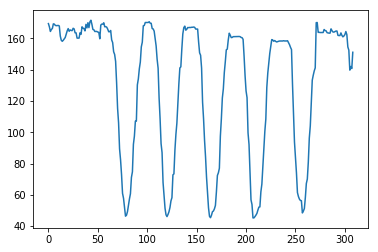

In [180]:
angle12list = dfnormalized['angle12'].tolist()
plt.plot(angle12list)
plt.show()

(309, 30)

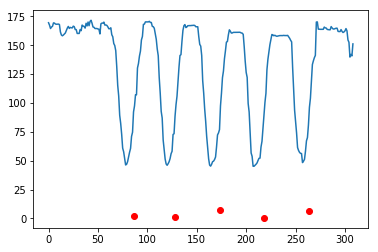

In [149]:
#Create reps: heuristic being used is that on the way down for bicep curl, the point where the elbow-wrist vector makes a 90 degrees that is the reset point
#To get the start of reps: 1. take abs|diff| from 90 degrees for angle 12 2. Find these minima points 3. If angle12 shift(1) is higher and angle12shift(-1) is lower then it is on way down


dfnormalized['angle12_diff90'] = np.absolute(dfnormalized['angle12'] - 90)
dfnormalized['min_angle12_diff90'] = dfnormalized.angle12_diff90[(dfnormalized.angle12_diff90.shift(1) > dfnormalized.angle12_diff90) & (dfnormalized.angle12_diff90.shift(-1) > dfnormalized.angle12_diff90)
                                                  &(dfnormalized.angle12_diff90<=diff90_threshold)
                                                  &(dfnormalized.angle12.shift(1) < dfnormalized.angle12) & (dfnormalized.angle12.shift(-1) > dfnormalized.angle12)]
plt.scatter(dfnormalized.index, dfnormalized['min_angle12_diff90'], c='r') #reds indicate the start of a rep
dfnormalized.angle12.plot()


In [187]:
#mark the rep number for each timestamp
#dfsub = dfnormalized.head(100)

repnumber = np.ones(dfnormalized.shape[0]) #create an array of ones for rep number 
rep_count = 1
for row_index,row in dfnormalized.iterrows():
    #print('\nrow number:',row_index, '\n-------------')
    #print(row['min_angle12_diff90'])
    if (np.isnan(row['min_angle12_diff90'])):
        rep_count=rep_count
    else:
        rep_count=rep_count + 1
    #print(rep_count)
    repnumber[row_index] = rep_count
    
dfnormalized['repnumber'] = repnumber.astype(int)    

#dfnormalized.head(200)

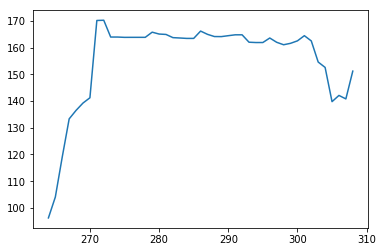

In [209]:
#Isolate data for each rep
repnum = 6
dfsub = dfnormalized[dfnormalized['repnumber'] ==repnum]
dfsub.angle12.plot()

In [227]:
#Geometric evaluation by rep
#Create a dataframe with max of angle12
dfsumm = dfnormalized.groupby('repnumber')['angle12'].max().rename('angle12_max').to_frame()

#append min of angle12
dfsumm['angle12_min'] = dfnormalized.groupby('repnumber')['angle12'].min()

#append max of angle23
dfsumm['angle23_max'] = dfnormalized.groupby('repnumber')['angle23'].max()

#append count of frames
dfsumm['angle12_count'] = dfnormalized.groupby('repnumber')['angle23'].count()

#Note that we might have to cut out beginning or end reps OR both

#find out if the weight was lifted fully up and/or arm moved significantly

    
dfsumm['result12'] = 'Weight not lifted up'
dfsumm.loc[dfsumm['angle12_min']<=60, 'result12'] = 'Weight was lifted up'
dfsumm['result23'] = 'Upper arm moved significantly'
dfsumm.loc[dfsumm['angle23_max']<=27, 'result23'] = 'Upper arm did not move significantly'
dfsumm['goodrep'] = 0
dfsumm.loc[(dfsumm['angle23_max']<=27) & (dfsumm['angle12_min']<=60), 'goodrep'] = 1
dfsumm

,angle12_max,angle12_min,angle23_max,angle12_count,result12,result23,goodrep
repnumber,,,,,,,
1,171.662069,46.344817,26.553898,86,Weight was lifted up,Upper arm did not move significantly,1
2,170.717410,46.078043,27.329580,42,Weight was lifted up,Upper arm moved significantly,0
3,167.886025,45.345131,25.733797,46,Weight was lifted up,Upper arm did not move significantly,1
4,163.367333,45.222538,23.229824,44,Weight was lifted up,Upper arm did not move significantly,1
5,159.290273,48.414310,23.360998,46,Weight was lifted up,Upper arm did not move significantly,1
6,170.207015,96.278047,37.272131,45,Weight not lifted up,Upper arm moved significantly,0


In [228]:
dfsumm.style

,angle12_max,angle12_min,angle23_max,angle12_count,result12,result23,goodrep
repnumber,,,,,,,
1,171.662,46.3448,26.5539,86,Weight was lifted up,Upper arm did not move significantly,1
2,170.717,46.078,27.3296,42,Weight was lifted up,Upper arm moved significantly,0
3,167.886,45.3451,25.7338,46,Weight was lifted up,Upper arm did not move significantly,1
4,163.367,45.2225,23.2298,44,Weight was lifted up,Upper arm did not move significantly,1
5,159.29,48.4143,23.361,46,Weight was lifted up,Upper arm did not move significantly,1
6,170.207,96.278,37.2721,45,Weight not lifted up,Upper arm moved significantly,0
